In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
def box_outliers(ser):
    new_ser = ser.sort_values()# 对待检测的数据集进行排序
    if new_ser.count() % 2 == 0: # 判断数据的总数量是奇数还是偶数
        # 计算Q3、Q1、IQR
        Q3 = new_ser[int(len(new_ser) / 2):].median()
        Q1 = new_ser[:int(len(new_ser) / 2)].median()
    elif new_ser.count() % 2 != 0:
        Q3 = new_ser[int((len(new_ser)-1) / 2):].median()
        Q1 = new_ser[:int((len(new_ser)-1) / 2)].median()
    IQR = round(Q3 - Q1, 1)
    rule = (round(Q3+1.5*IQR, 1) < ser)|(round(Q1-1.5*IQR, 1) > ser)
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值及其索引
    outliers = ser.iloc[index]
    return outliers

In [3]:
second_hand_house = pd.read_excel(r'./data/handroom.xlsx')
second_hand_house.head()

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
0,锦江,翡翠城四期,翡翠城四期跃层 采光视野好 可看沙河 客厅带有阳台,高楼层(共29层)| 2009年建 |2室1厅 | 85.21平米 | 东南,331人关注/ 5月前发布,近地铁,176036.0
1,锦江,时代豪庭一期,时代豪庭套三 中间楼层 有装修 业主处理资产出售,中楼层(共38层)| 2009年建 |3室1厅 | 155.79平米| 东南,137人关注/ 5月前发布,NaN,26959.4
2,锦江,卓锦城六期,卓锦城六期紫郡房源，套三，进门带入户,中楼层(共31层)| 2014年建 |3室1厅 | 89.33平米| 西南,36人关注 / 23天前发布,NaN,22612.8
3,锦江,星城银座,春熙路太古里标准套一出售，现租给民宿。,高楼层(共11层) | 2003年建 | 1室0厅 | 51.07平米 | 南,29人关注 / 5月前发布,近地铁,18014.5
4,锦江,新莲新苑,新莲新苑优质套三，诚心出售，近沙河，采光视野好。,高楼层(共7层) | 2001年建 | 3室1厅 | 77.7平米 | 东南,14人关注 / 5月前发布,NaN,13513.5


In [4]:
second_hand_house.info() # 查看摘要信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 7 columns):
区           1058 non-null object
小区名称        1057 non-null object
标题          1058 non-null object
房屋信息        1058 non-null object
关注          1058 non-null object
地铁          441 non-null object
单价(元/平米)    1058 non-null float64
dtypes: float64(1), object(6)
memory usage: 57.9+ KB


In [5]:
second_hand_house = second_hand_house.dropna(subset=['小区名称']) # subset:表示删除指令列中包含有缺失值的一行数据
second_hand_house.isnull().sum()

区             0
小区名称          0
标题            0
房屋信息          0
关注            0
地铁          616
单价(元/平米)      0
dtype: int64

In [6]:
second_hand_house.duplicated().head() # 检查重复值

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [7]:
second_hand_house[second_hand_house.duplicated().values==True].head()

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
54,锦江,柳江新居五期,琉璃场柳江新居五期带装修套二，房东诚心出售,低楼层(共18层) | 2010年建 | 2室1厅 | 80.97平米 | 南 北,58人关注 / 3月前发布,近地铁,13832.3
55,锦江,锦洲花园,此房是锦洲花园中庭跃层，顶楼带大花园,高楼层(共6层) | 2004年建 | 3室2厅 | 124.68平米 | 西北,135人关注 / 5月前发布,NaN,19890.9
97,锦江,澳龙名城,澳龙名城标准套四双卫随时可看房！,低楼层(共16层) | 2009年建 | 4室2厅 | 116.58平米 | 东南 西北,95人关注 / 8月前发布,近地铁,25561.8
98,锦江,嘉和园二期,锦江 川师 狮子山 嘉和园 套二出售,低楼层(共6层) | 2002年建 | 2室2厅 | 74平米 | 东,19人关注 / 8月前发布,近地铁,12567.6
99,锦江,钢管厂五区,海椒市街15号标准套二，户型方正不临街。,高楼层(共7层) | 1988年建 | 2室1厅 | 82平米 | 东南,60人关注 / 1年前发布,NaN,11097.6


In [8]:
second_hand_house = second_hand_house.drop_duplicates() # 删除重复数据

In [9]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 为显示中文

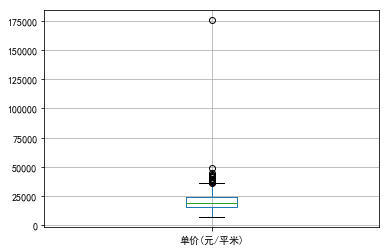

In [10]:
second_hand_house.boxplot(column='单价(元/平米)')

In [11]:
box_outliers(second_hand_house['单价(元/平米)'])

0      176036.0
6       43299.0
11      39690.4
51      39071.1
130     36633.0
134     49306.8
136     37391.3
181     39473.7
222     36622.4
235     36565.8
316     37512.1
323     36492.4
336     40955.2
370     36931.8
394     39433.8
519     42639.5
538     40828.2
662     38755.4
707     37810.4
713     44451.8
736     38530.9
889     36958.1
894     39776.6
927     42319.1
933     36811.2
Name: 单价(元/平米), dtype: float64

In [12]:
second_hand_house = second_hand_house.replace(to_replace=176036.0, value=17603.6)

In [13]:
second_hand_house.head()

,区,小区名称,标题,房屋信息,关注,地铁,单价(元/平米)
0,锦江,翡翠城四期,翡翠城四期跃层 采光视野好 可看沙河 客厅带有阳台,高楼层(共29层)| 2009年建 |2室1厅 | 85.21平米 | 东南,331人关注/ 5月前发布,近地铁,17603.6
1,锦江,时代豪庭一期,时代豪庭套三 中间楼层 有装修 业主处理资产出售,中楼层(共38层)| 2009年建 |3室1厅 | 155.79平米| 东南,137人关注/ 5月前发布,NaN,26959.4
2,锦江,卓锦城六期,卓锦城六期紫郡房源，套三，进门带入户,中楼层(共31层)| 2014年建 |3室1厅 | 89.33平米| 西南,36人关注 / 23天前发布,NaN,22612.8
3,锦江,星城银座,春熙路太古里标准套一出售，现租给民宿。,高楼层(共11层) | 2003年建 | 1室0厅 | 51.07平米 | 南,29人关注 / 5月前发布,近地铁,18014.5
4,锦江,新莲新苑,新莲新苑优质套三，诚心出售，近沙河，采光视野好。,高楼层(共7层) | 2001年建 | 3室1厅 | 77.7平米 | 东南,14人关注 / 5月前发布,NaN,13513.5
